# Project 1 — Adult Income (Census)
## Supervised Learning

**Task:** Binary classification — income ≤50K vs >50K  
**Metrics:** F1, Accuracy; PR-AUC for threshold-based results  
**Workflow:** EDA → Hypotheses → Train/tune (DT, kNN, SVM, NN-sklearn, NN-PyTorch) → Interpretation → Conclusion

---
## 1. Setup and data loading

In [1]:
import sys
from config import RANDOM_SEED, DATA_PATH, TARGET_COLUMN
from utils import set_seed
from data_loading import load_adult, get_target_and_features

set_seed()
# Load and inspect
df = load_adult()
X, y = get_target_and_features(df)
print(df.shape)
print(y.value_counts())

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
(45175, 15)
class
<=50K    33973
>50K     11202
Name: count, dtype: int64


---
## 2. Exploratory Data Analysis (EDA)

Class distribution, basic stats, plots. Ground for hypotheses.


First 5 rows:
     age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  34.0    Private  198693.0          10th            6.0       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black  Male           0.0           0.0   
1    Farming-fishing        Husband  White  Male           0.0           0.0   
2    Protective-serv        Husband  White  Male           0.0           0.0   
3  Machine-op-inspct        Husband  Black  Male        7688.0           0.0   
4      Other-service  Not-in-family  White  Male           0.0           0.0   

   hours-per-wee

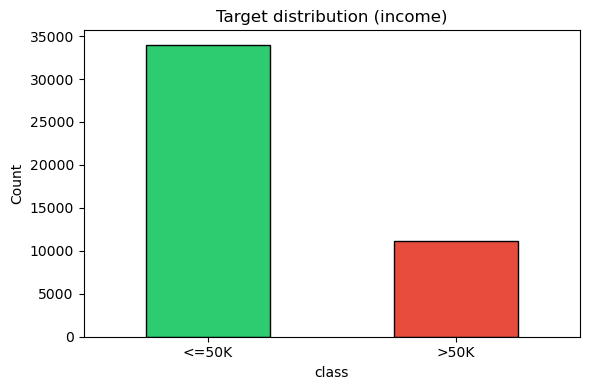

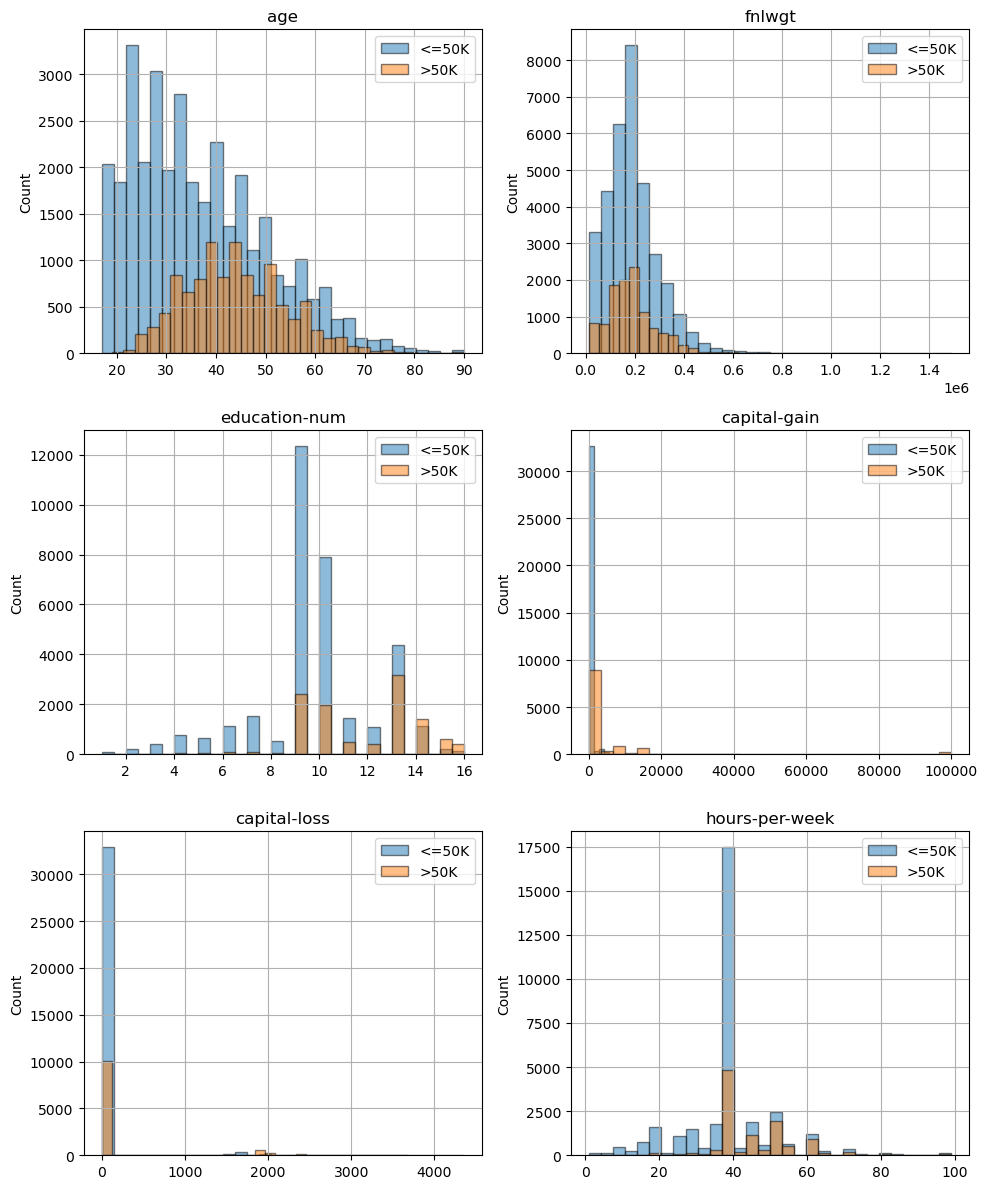


Correlation of numeric features with target (income >50K = 1):
------------------------------------------------------------
  fnlwgt              : -0.0072
  capital-loss        :  0.1487
  capital-gain        :  0.2211
  hours-per-week      :  0.2271
  age                 :  0.2368
  education-num       :  0.3330


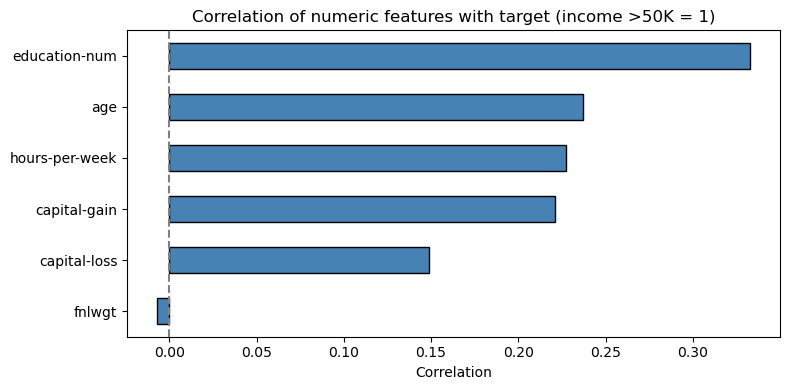


Correlation matrix (numeric features):
------------------------------------------------------------
                     age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
age             1.000000 -0.075590       0.037269      0.079649      0.059258        0.101604
fnlwgt         -0.075590  1.000000      -0.041992     -0.004118     -0.004359       -0.018712
education-num   0.037269 -0.041992       1.000000      0.126982      0.081719        0.146463
capital-gain    0.079649 -0.004118       0.126982      1.000000     -0.032137        0.083868
capital-loss    0.059258 -0.004359       0.081719     -0.032137      1.000000        0.054141
hours-per-week  0.101604 -0.018712       0.146463      0.083868      0.054141        1.000000


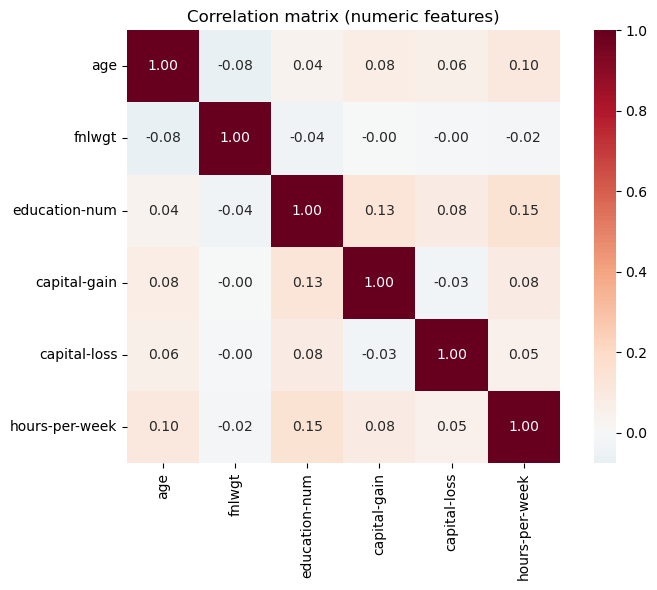

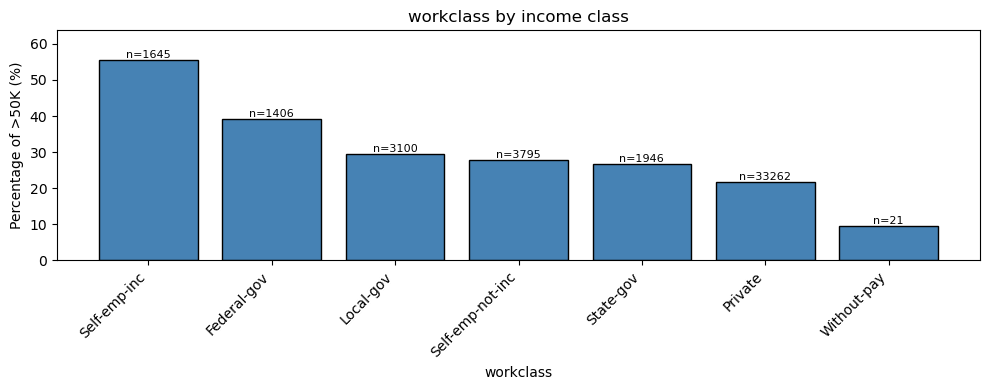

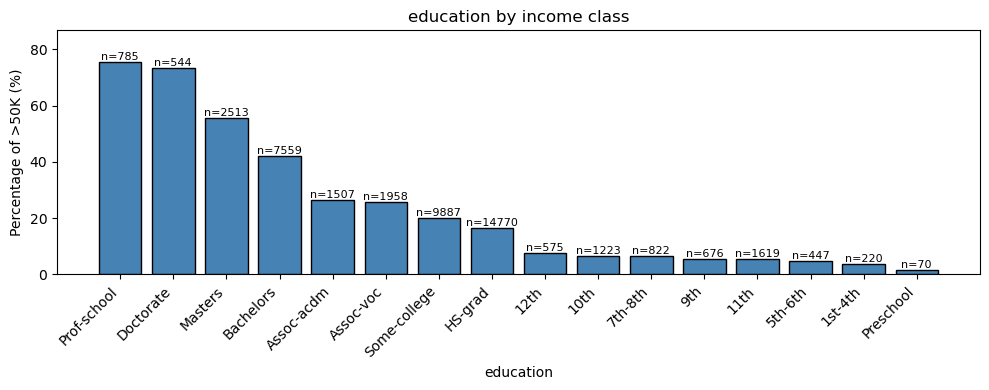

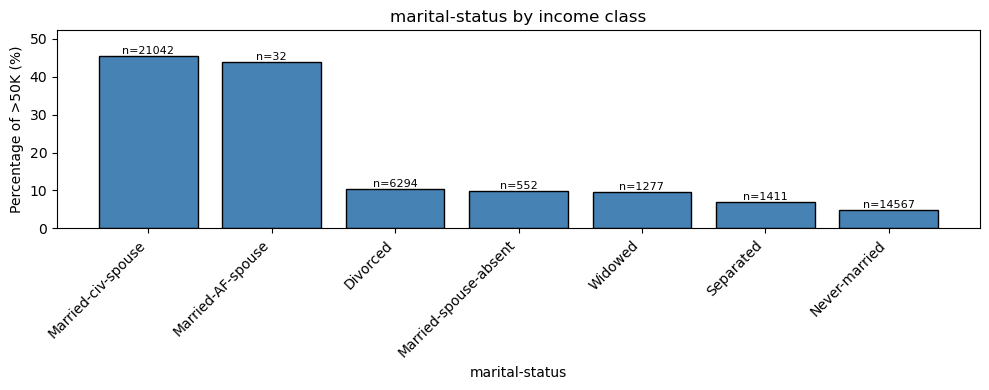

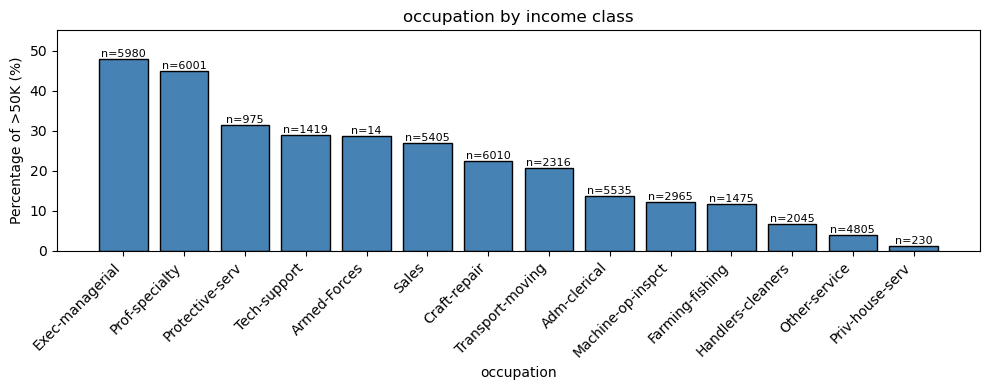

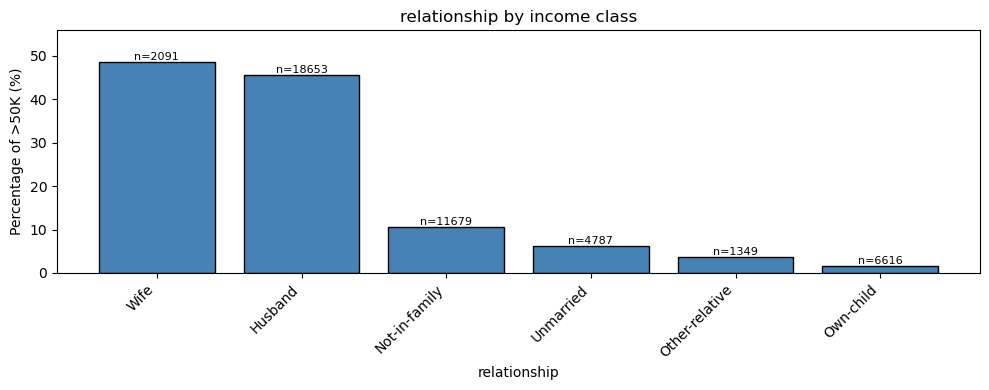

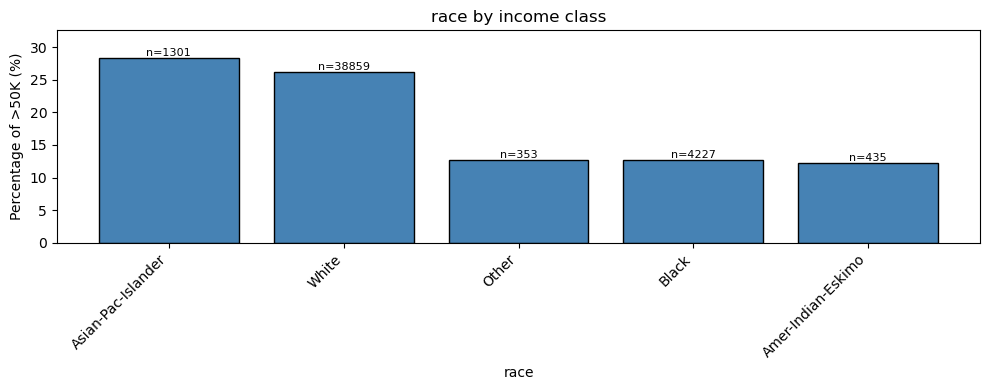

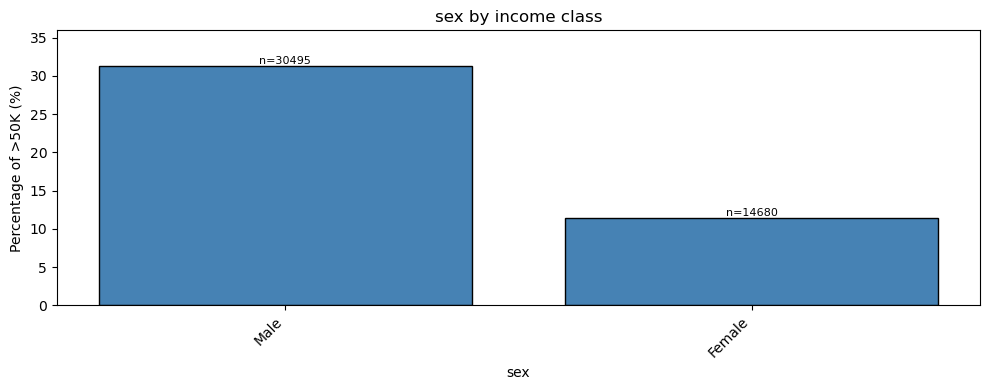

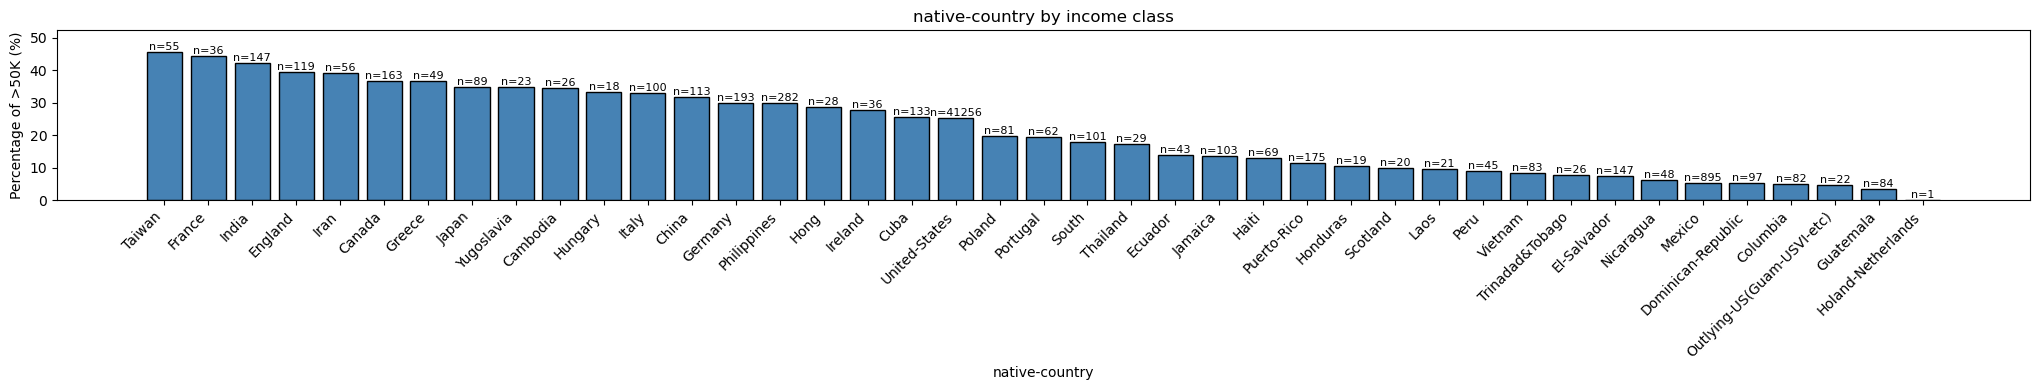


EDA complete.

EDA results saved to: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\ml-supervised-project1\EDA_RESULTS.txt


{'numeric_cols': ['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 'categorical_cols': ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country']}

In [2]:
from eda import run_eda

# Run full EDA: class distribution, missing/dtypes, numeric & categorical summaries, plots
# Figures are saved to outputs/
run_eda(df, save_figures=True)


*Write your hypotheses here (paragraph form).*

---
## 4. Preprocessing and leakage controls

Single train/test split; tuning via CV on training only. State what was removed/verified for leakage.

In [3]:
from preprocessing import get_dataset

X_train, y_train, X_test, y_test = get_dataset()
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
Train: 36140, Test: 9035


---
## 5. Experiments

For each algorithm: learning curves, model-complexity curve, runtime, confusion matrix at justified operating point.

### 5.1 Decision Tree

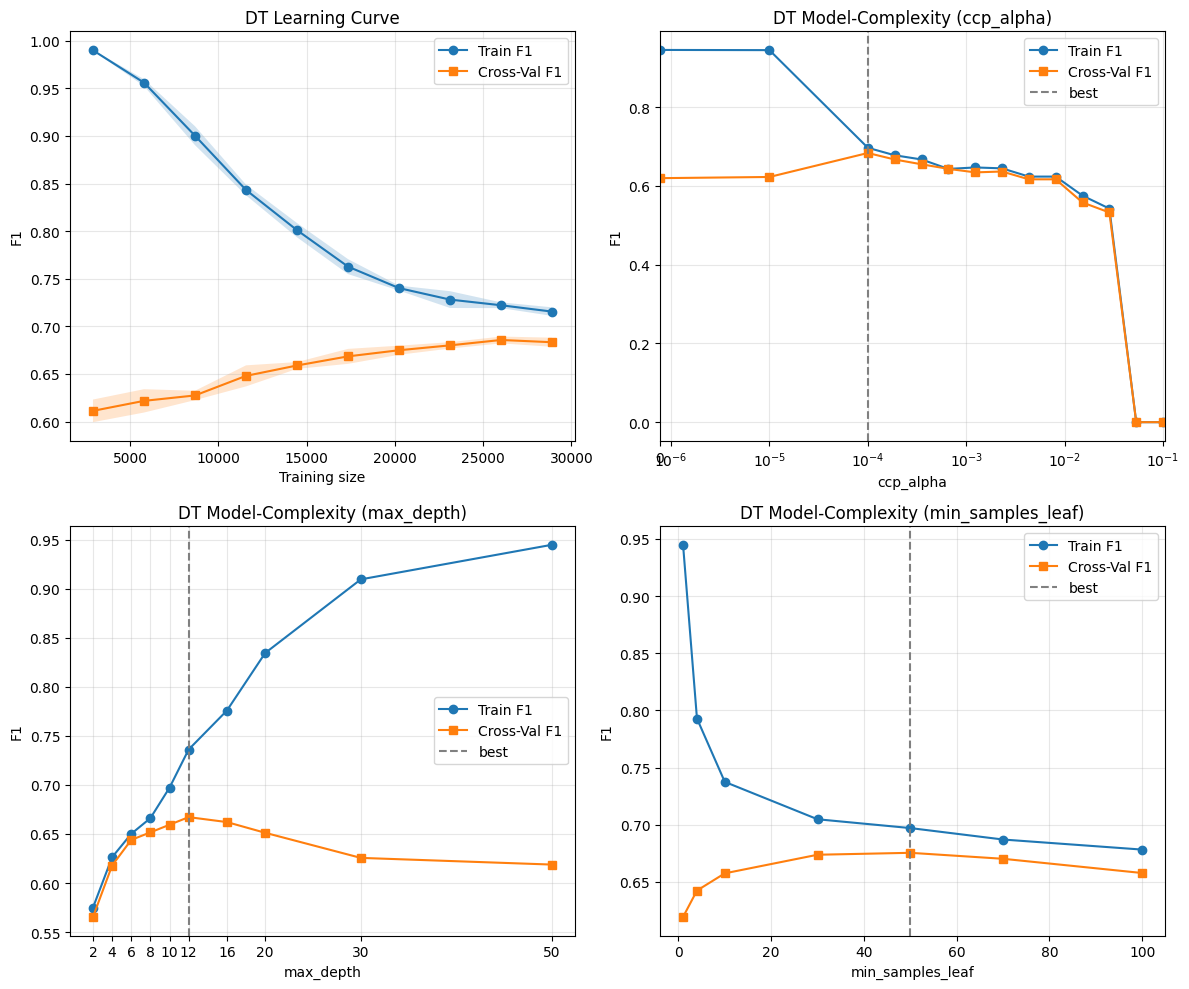

--- Best from each model-complexity curve (other params at standard) ---
  ccp_alpha curve (max_depth=None, min_samples_leaf=1): best ccp_alpha=0.000100, CV F1=0.6833
  max_depth curve (ccp_alpha=0, min_samples_leaf=1):     best max_depth=12, CV F1=0.6672
  min_samples_leaf curve (ccp_alpha=0, max_depth=None):  best min_samples_leaf=50, CV F1=0.6755
--- Grid-search best (joint tuning) ---
  CV F1=0.6836, params={'ccp_alpha': 9.999999999999999e-05, 'max_depth': 30, 'min_samples_leaf': 1}

Best params (used for final model): {'criterion': 'gini', 'ccp_alpha': 9.999999999999999e-05, 'max_depth': 30, 'min_samples_leaf': 1}
Test metrics: {'accuracy': 0.8589928057553957, 'f1': 0.6771414090217942, 'pr_auc': 0.7904097950971055}
Depth: 19 | Leaves: 121
Runtime - fit: 0.1467 s | predict: 0.0011 s

Confusion matrix (0=<=50K, 1=>50K):
[6425, 370]
[904, 1336]

Results saved to: /home/ubuntu/ml-supervised-project1/DT_results.txt


In [6]:
from utils import set_seed
from models_dt import run_dt

set_seed()
dt_results = run_dt(X_train, y_train, X_test, y_test)

### Decision Tree with class_weight='balanced'

Same pipeline as above, but with `class_weight='balanced'` to handle class imbalance. Results and plots use suffix `_class_weight` so you can compare.

In [ ]:
dt_results_cw = run_dt(X_train, y_train, X_test, y_test, class_weight='balanced')

### 5.2 k-Nearest Neighbors

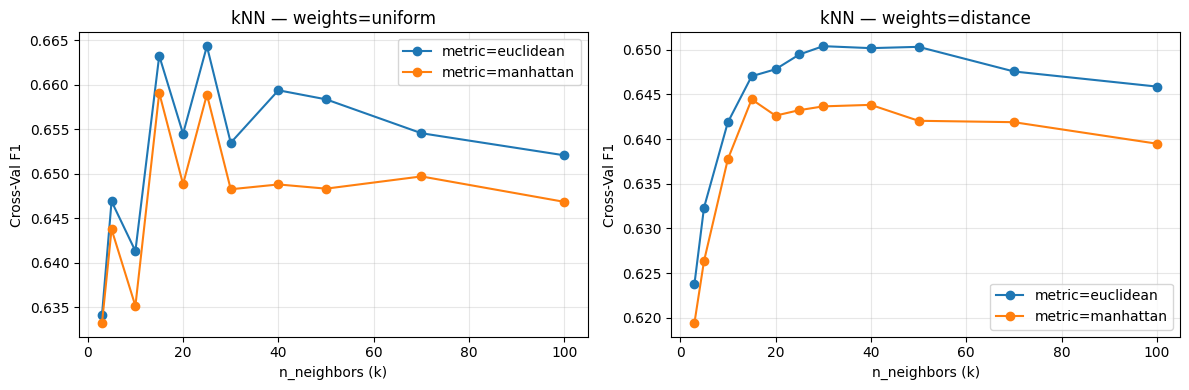

--- kNN: Model-complexity (weights × metric, CV F1 vs k) ---
k_values: [3, 5, 10, 15, 20, 25, 30, 40, 50, 70, 100]
CV F1 at k=20:
  weights=uniform, metric=euclidean: 0.6545
  weights=uniform, metric=manhattan: 0.6488
  weights=distance, metric=euclidean: 0.6478
  weights=distance, metric=manhattan: 0.6426
Best (k, weights, metric): {'k': 25, 'weights': 'uniform', 'metric': 'euclidean'} | best_cv_f1: 0.6644
Results saved to: /home/ubuntu/ml-supervised-project1/KNN_results.txt


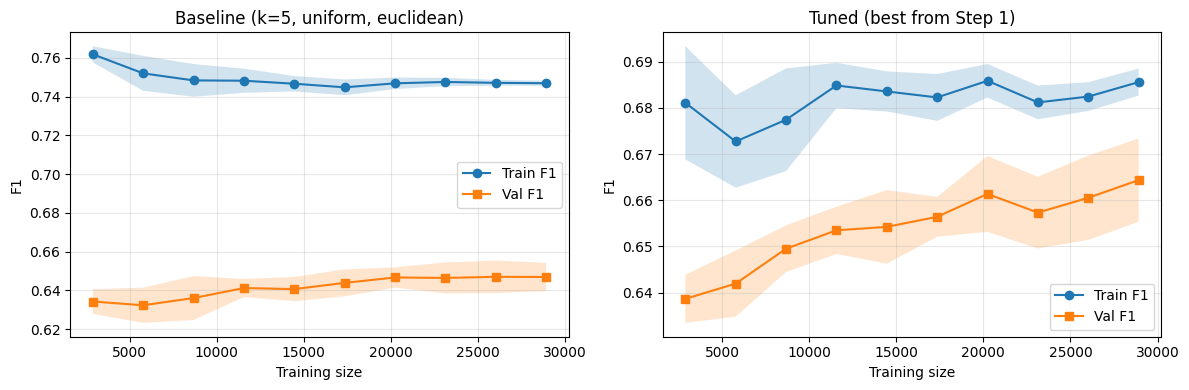

--- kNN Step 2: Learning curves ---
train_sizes: [2891, 5782, 8673, 11564, 14456, 17347, 20238, 23129, 26020, 28912]
Baseline (k=5): val_f1_mean: [0.6342, 0.6323, 0.636, 0.6412, 0.6407, 0.6439, 0.6467, 0.6464, 0.647, 0.6469]
Tuned: {'k': 25, 'weights': 'uniform', 'metric': 'euclidean'} val_f1_mean: [0.6387, 0.642, 0.6495, 0.6535, 0.6542, 0.6564, 0.6614, 0.6573, 0.6605, 0.6644]
Appended to: /home/ubuntu/ml-supervised-project1/KNN_results.txt
--- kNN Step 3: Test evaluation ---
Best config: {'k': 25, 'weights': 'uniform', 'metric': 'euclidean'}
Test metrics: {'accuracy': 0.844382955174322, 'f1': 0.6590688651794374, 'pr_auc': 0.7419915760329678}
Runtime - fit (s): 0.0085 | predict (s): 0.2714
Confusion matrix (0=<=50K, 1=>50K): [[6270, 525], [881, 1359]]
Appended to: /home/ubuntu/ml-supervised-project1/KNN_results.txt


In [3]:
from utils import set_seed
from models_knn import run_knn_step2, run_knn_learning_curves, run_knn_test_eval

set_seed()
knn_results = run_knn_step2(X_train, y_train, X_test, y_test)
knn_lc_results = run_knn_learning_curves(X_train, y_train, X_test, y_test, best_config=knn_results["best_k_weights_metric"])
knn_test_results = run_knn_test_eval(X_train, y_train, X_test, y_test, best_config=knn_results["best_k_weights_metric"])

### 5.3 Support Vector Machines (linear + RBF)

SVM RBF (gamma): 100%|██████████| 3/3 [21:50<00:00, 436.96s/it]


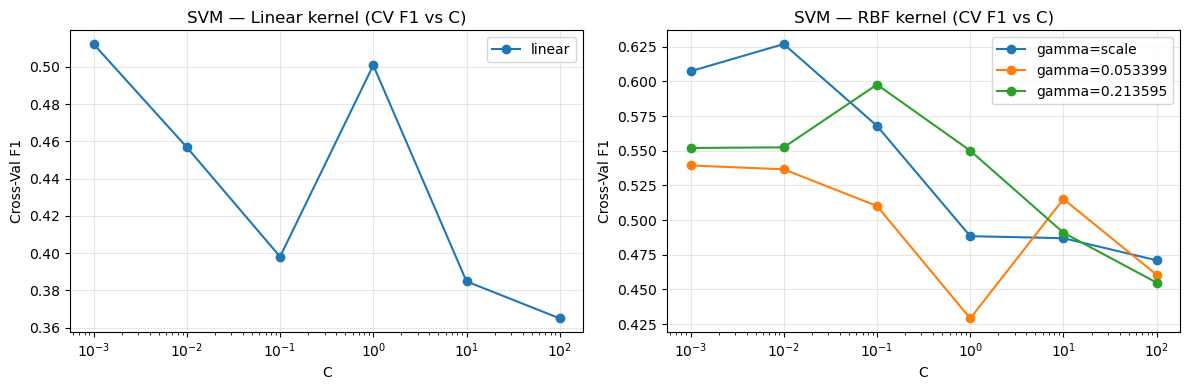

Saved: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\outputs\svm_model_complexity.png
--- SVM Step 1: Model-complexity (linear vs RBF, CV F1 vs C) ---
Linear — CV F1 at C= 1 : 0.5008142538904755
RBF gamma=scale — CV F1: [0.6073, 0.6269, 0.5679, 0.4884, 0.4869, 0.4709]
RBF gamma=0.053399 — CV F1: [0.5394, 0.5366, 0.5101, 0.4291, 0.5151, 0.4605]
RBF gamma=0.213595 — CV F1: [0.552, 0.5524, 0.5977, 0.5501, 0.4908, 0.4548]
Best config: {'kernel': 'rbf', 'C': 0.01, 'gamma': 'scale'} | best_cv_f1: 0.6269
Results saved to: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\SVM_results.txt


SVM learning curves: 100%|██████████| 2/2 [1:05:14<00:00, 1957.46s/it]


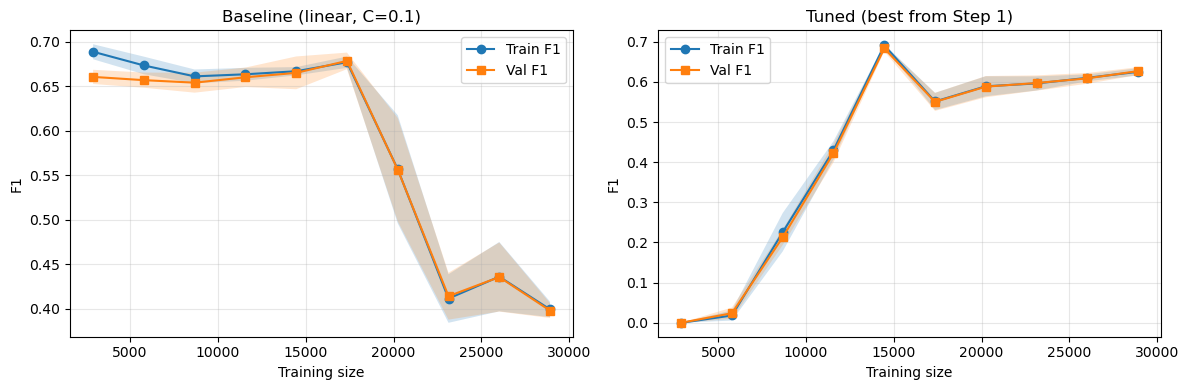

Saved: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\outputs\svm_learning_curves.png
--- SVM Step 2: Learning curves ---
train_sizes: [2891, 5782, 8673, 11564, 14456, 17347, 20238, 23129, 26020, 28912]
Baseline (linear C=0.1): val_f1_mean: [0.6606, 0.657, 0.6541, 0.6602, 0.6652, 0.6786, 0.5565, 0.4143, 0.4358, 0.3981]
Tuned: {'kernel': 'rbf', 'C': 0.01, 'gamma': 'scale'} val_f1_mean: [0.0, 0.0239, 0.213, 0.4225, 0.6834, 0.5503, 0.5882, 0.5972, 0.6089, 0.6269]
Appended to: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\SVM_results.txt


c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


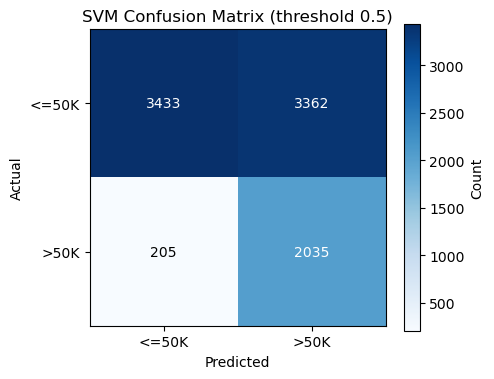

Saved: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\outputs\svm_confusion_matrix.png
--- SVM Step 3: Test evaluation ---
Best config: {'kernel': 'rbf', 'C': 0.01, 'gamma': 'scale'}
Test metrics: {'accuracy': 0.6052019922523519, 'f1': 0.532931779494566, 'pr_auc': 0.6343953002088645}
Runtime - fit (s): 169.7133 | predict (s): 10.3297
Confusion matrix (0=<=50K, 1=>50K): [[3433, 3362], [205, 2035]]
Appended to: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\Project 1 _ Dataset 1\SVM_results.txt


In [4]:
from utils import set_seed
from models_svm import run_svm_step1, run_svm_learning_curves, run_svm_test_eval

set_seed()
svm_results = run_svm_step1(X_train, y_train, X_test, y_test)
svm_lc_results = run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results["best_config"])
svm_test_results = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results["best_config"])

### SVM with class_weight='balanced'

Same pipeline (Step 1 model-complexity, Step 2 learning curves, Step 3 test eval) with `class_weight='balanced'`. Plots and results file use suffix `_class_weight`.

In [ ]:
svm_results_cw = run_svm_step1(X_train, y_train, X_test, y_test, class_weight='balanced')
svm_lc_results_cw = run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results_cw["best_config"], class_weight='balanced')
svm_test_results_cw = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results_cw["best_config"], class_weight='balanced')

### 5.4 Neural Network — scikit-learn (SGD only)

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
Train: 36140, Test: 9035


NN width sweep: 100%|██████████| 25/25 [00:00<00:00, 27962.03it/s]


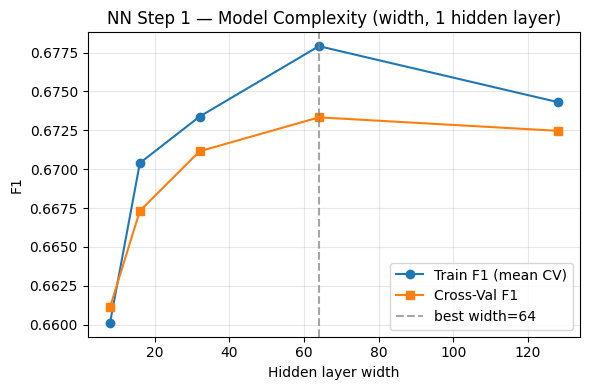

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_width_model_complexity.png
Step 1 best width: 64
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt


NN step2 depth sweep: 100%|██████████| 15/15 [00:00<00:00, 26335.10it/s]


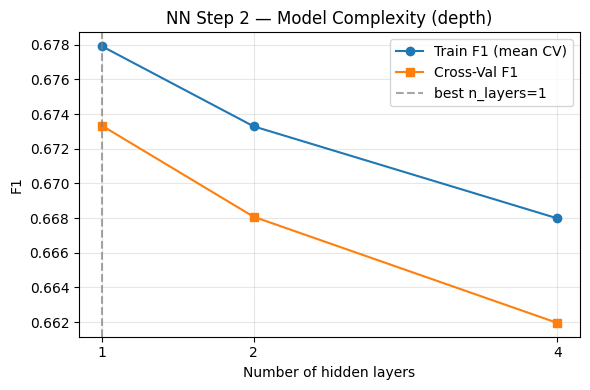

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_depth_model_complexity.png
Step 2 best architecture: [64]
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt


NN step3 LR sweep: 100%|██████████| 20/20 [00:00<00:00, 22435.43it/s]


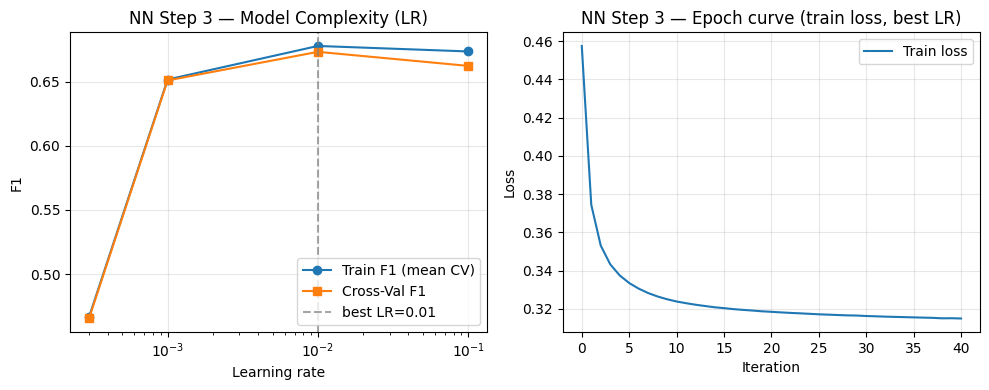

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_lr_curves.png
Step 3 best LR: 0.01
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt
Best model — architecture: [64] | LR: 0.01


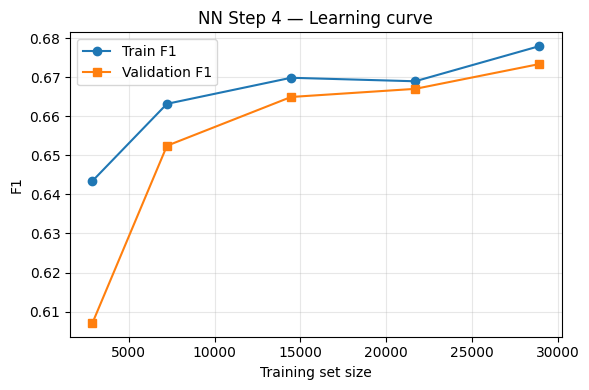

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_learning_curve.png


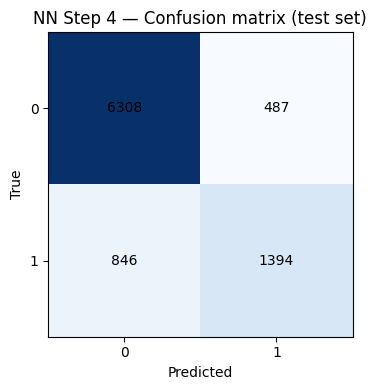

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_confusion_matrix.png
Step 4 done. Test F1: 0.6765 | Fit time: 3.045 s


In [7]:
from utils import set_seed
from preprocessing import get_dataset
from models_nn_sklearn import run_nn_step1, run_nn_step2, run_nn_step3, run_nn_step4

set_seed()
X_train, y_train, X_test, y_test = get_dataset()
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

# Step 1: Width sweep (1 hidden layer), model complexity curve → best width
nn_step1 = run_nn_step1(X_train, y_train, X_test, y_test)

# Step 2: Depth vs width [64], [32,32], [16,16,16,16] → best architecture
nn_step2 = run_nn_step2(X_train, y_train, X_test, y_test, nn_step1)

# Step 3: LR sweep with best architecture → best LR; epoch curve
nn_step3 = run_nn_step3(X_train, y_train, X_test, y_test, nn_step2)

# Step 4: Final model — learning curve, confusion matrix, runtime, test set metrics
nn_step4 = run_nn_step4(X_train, y_train, X_test, y_test, nn_step3)

# All results saved to NN_sklearn_results.txt

### NN (sklearn) with class weighting (sample_weight='balanced')

Same 4-step pipeline with `use_class_weight=True`. MLPClassifier does not support `class_weight`; we use `sample_weight` from `sklearn.utils.class_weight.compute_sample_weight('balanced', y)` in every `fit()`. Plots and results use suffix `_class_weight`.

In [ ]:
nn_step1_cw = run_nn_step1(X_train, y_train, X_test, y_test, use_class_weight=True)
nn_step2_cw = run_nn_step2(X_train, y_train, X_test, y_test, nn_step1_cw)
nn_step3_cw = run_nn_step3(X_train, y_train, X_test, y_test, nn_step2_cw)
nn_step4_cw = run_nn_step4(X_train, y_train, X_test, y_test, nn_step3_cw)

### 5.5 Neural Network — PyTorch (SGD only)

In [8]:
# from models_nn_pytorch import train_and_tune_nn_pytorch
# Compare with sklearn: optimization, stability, runtime, tunability

---
## 6. Cross-model comparison

Compare algorithms: metric vs runtime, stability vs capacity, sensitivity to hyperparameters, preprocessing effects. Tie to course concepts.

*Tables and short code for comparison; discussion in markdown.*

---
## 7. Interpretation and conclusion

- Evaluate whether results support or contradict hypotheses.
- Type I/II errors at chosen operating point.
- What we learned about model behavior on this dataset.
- One realistic next step.

*Write analysis in paragraphs with coherent reasoning.*